<a href="https://colab.research.google.com/github/vijayakuruba/IFT6759_Distribution_shifts_WILDS/blob/main/Explorotary_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [11]:
%cd /content/drive/My Drive/IFT6759_Distribution_shifts_WILDS
!ls

/content/drive/My Drive/IFT6759_Distribution_shifts_WILDS
Data_augument.ipynb    examples   IFT6759.ipynb  README.md  wilds
dataset_preprocessing  gitignore  logs		 setup.py


In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

In [12]:
with open(r'/content/drive/MyDrive/IFT6759_Distribution_shifts_WILDS/examples/data/iwildcam_v2.0/iwildcam2021_train_annotations_final.json') as json_file:
    train_data = json.load(json_file)
print(train_data.keys())

dict_keys(['images', 'annotations', 'categories'])


In [13]:
train_annotations = pd.DataFrame(train_data['annotations'])
train_images = pd.DataFrame(train_data['images'])
train_categories = pd.DataFrame(train_data['categories'])

In [ ]:
train_images.head(5)

In [ ]:
df_cat = pd.DataFrame(train_data["categories"])
display(f"Total Categories: {df_cat.name.nunique()}")
display(df_cat.sample(5))


'Total Categories: 206'

,id,name
187,415,lophura erythrophthalma
38,96,aepyceros melampus
197,563,tigrisoma mexicanum
27,74,lepus saxatilis
28,77,turtur calcospilos


In [ ]:
display("Samples of annotations and images")
df_train_annotations = pd.DataFrame(train_data["annotations"])
display(df_train_annotations.sample())

'Samples of annotations and images'

,id,image_id,category_id
181180,a323c7fc-21bc-11ea-a13a-137349068a90,90a66210-21bc-11ea-a13a-137349068a90,372


In [ ]:
df_train_annotations.category_id.value_counts()

0      69487
372    16282
374    12408
96      8440
317     7414
       ...  
402        1
420        1
114        1
417        1
252        1
Name: category_id, Length: 206, dtype: int64

Excluding 69487 images from the empty class in the barplot visualization


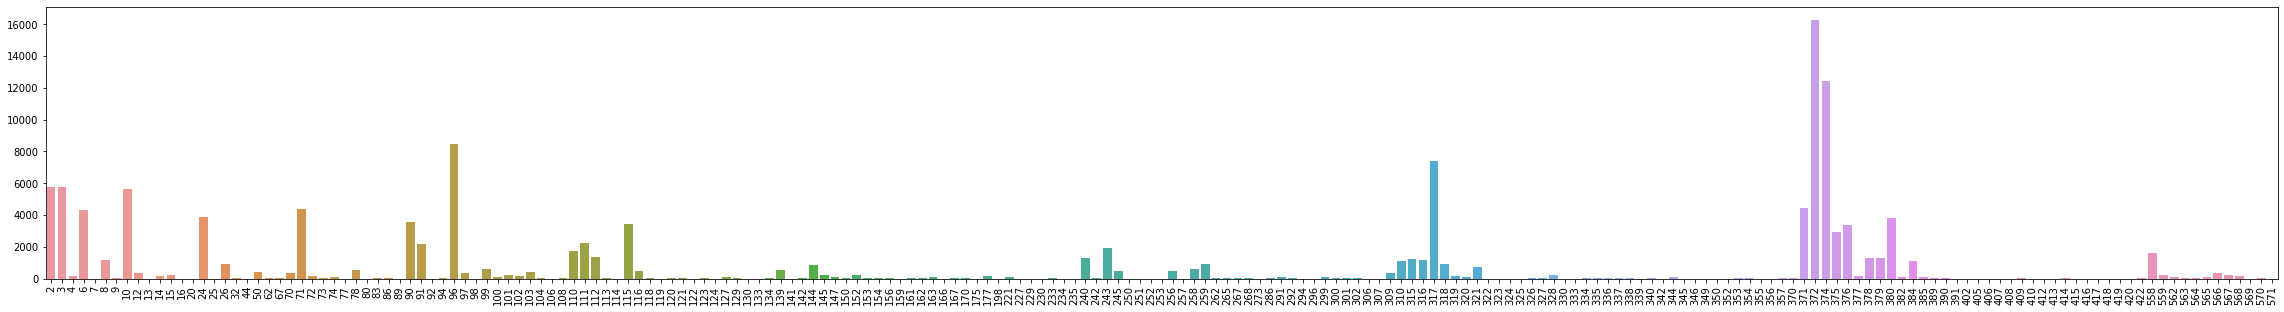

In [ ]:
plt.figure(figsize=(40,5))
df_cat_dist = df_train_annotations.category_id.value_counts()
print(f"Excluding {df_cat_dist[0]} images from the empty class in the barplot visualization")
df_cat_dist = df_cat_dist[1:]
chart = sns.barplot(y=df_cat_dist.values, x=df_cat_dist.index, orient='v')
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)



In [35]:
def get_first_category(img_id):
    """Find first the image category by id."""
    # get category id
    category_id = train_annotations[train_annotations.image_id == img_id].category_id.values[0]
    # get category name
    category_name = train_categories[train_categories.id == category_id].name.values[0]
    return category_id, category_name

def visualize_image_grid(rows, cols):
    """Visualize random grid of images with the first category."""
    filenames = train_images.file_name.unique()
    #print(filenames)
    #filenames=['8b02698a-21bc-11ea-a13a-137349068a90.jpg',
    #           '8e5b81de-21bc-11ea-a13a-137349068a90.jpg',
    #           '8c6be0e4-21bc-11ea-a13a-137349068a90.jpg',
    #           '8f1f5f46-21bc-11ea-a13a-137349068a90.jpg',
    #           '974a365a-21bc-11ea-a13a-137349068a90.jpg',
    #           '93a4d938-21bc-11ea-a13a-137349068a90.jpg',
    #           '8a0d123c-21bc-11ea-a13a-137349068a90.jpg']
    
    np.random.seed(0)
    img_idx = np.random.randint(len(filenames), size=rows * cols)
    
    fig, axs = plt.subplots(rows, cols, figsize=(15,7))
    
    for r in range(rows):
        for c in range(cols):
            # get the image and image id
            filename = filenames[img_idx[rows*r + c]]
            img_id = filename.split('.')[0]
            # get the category
            category_id, category = get_first_category(img_id)
            
            img = Image.open(TRAIN_DIR + filename)
            
            axs[r,c].imshow(img)
            axs[r,c].axis('off')
            axs[r,c].set_title('{}:{}'.format(category_id, category))
            
    plt.suptitle('Train images', fontsize=16)
    plt.show()

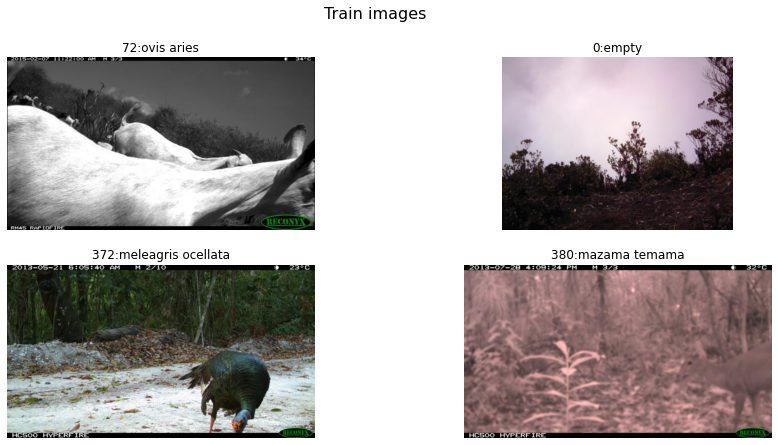

In [36]:
TRAIN_DIR = '/content/drive/MyDrive/IFT6759_Distribution_shifts_WILDS/examples/data/iwildcam_v2.0/train/'
visualize_image_grid(2,2)
